<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Análise Exploratória de Dados de Logística II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Manipulação;</li>
  <li>Visualização;</li>
  <li>Storytelling.</li>
</ol>


---

# **Exercícios**

Este *notebook* deve servir como um guia para **você continuar** a construção da sua própria análise exploratória de dados. Fique a vontate para copiar os códigos da aula mas busque explorar os dados ao máximo. Por fim, publique seu *notebook* no [Kaggle](https://www.kaggle.com/).

---

# **Análise Exploratória de Dados de Logística**

## 1\. Contexto

O problema envolve a otimização das operações de entrega, focando na eficiência do uso dos veículos, a distribuição das entregas por região e a variabilidade nos tamanhos das entregas. Isso visa melhorar a alocação de recursos e o planejamento logístico.

## 2\. Pacotes e bibliotecas

In [4]:
# importe todas as suas bibliotecas aqui, siga os padrões do PEP8:
#
# - 1º pacotes nativos do python: json, os, etc.;
# - 2º pacotes de terceiros: pandas, seabornm etc.;
# - 3º pacotes que você desenvolveu.
#

import json
import pandas as pd
import seaborn as sns
from geopy.distance import geodesic

## 3\. Exploração de dados

In [5]:
# faça o código de exploração de dados:
#
# - coleta de dados;
# - wrangling da estrutura;
# - exploração do schema;
# - etc.

# Coleta dos dados
with open(file='deliveries.json', mode='r', encoding='utf8') as file:
    data = json.load(file)

In [6]:
# Ler o dataframe com pandas
deliveries_df = pd.DataFrame(data)
deliveries_df.head()

,name,region,origin,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [7]:
# Wranling da estrutura - tratar os dados da coluna origin
hub_origin_df = pd.json_normalize(deliveries_df['origin'])
deliveries_df = pd.merge(left=deliveries_df, right=hub_origin_df, how='inner', left_index=True, right_index=True)
deliveries_df.head()


,name,region,origin,vehicle_capacity,deliveries,lng,lat
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p...",-48.054989,-15.838145
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po...",-48.054989,-15.838145
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p...",-48.054989,-15.838145
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p...",-47.893662,-15.805118
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p...",-48.054989,-15.838145


In [8]:
# Deletando a tabela origin e organizando as colunas do dataframe
deliveries_df = deliveries_df.drop('origin', axis=1)
deliveries_df = deliveries_df[['name', 'region', 'lng', 'lat', 'vehicle_capacity','deliveries']]
deliveries_df.head()

,name,region,lng,lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [9]:
# 
pd.set_option('display.max_colwidth', None)

deliveries_exploded_df = deliveries_df[['deliveries']].explode('deliveries')
deliveries_exploded_df.head()


,deliveries
0,"{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'point': {'lng': -48.11618888384239, 'lat': -15.848929154862294}, 'size': 9}"
0,"{'id': '320c94b17aa685c939b3f3244c3099de', 'point': {'lng': -48.11819489551, 'lat': -15.850772371049631}, 'size': 2}"
0,"{'id': '3663b42f4b8decb33059febaba46d5c8', 'point': {'lng': -48.11248339849675, 'lat': -15.84787055941764}, 'size': 1}"
0,"{'id': 'e11ab58363c38d6abc90d5fba87b7d7', 'point': {'lng': -48.11802268617869, 'lat': -15.846471025281456}, 'size': 2}"
0,"{'id': '54cb45b7bbbd4e34e7150900f92d7f4b', 'point': {'lng': -48.114898174591026, 'lat': -15.85805462185708}, 'size': 7}"


In [10]:
deliveries_normalized_df = pd.concat([
    pd.DataFrame(deliveries_exploded_df['deliveries'].apply(lambda record: record['size'])).rename(columns={'deliveries': 'delivery_size'}),
    pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lng"])).rename(columns={"deliveries": "delivery_lng"}),
    pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lat"])).rename(columns={"deliveries": "delivery_lat"}),
], axis = 1)
deliveries_normalized_df.head()

,delivery_size,delivery_lng,delivery_lat
0,9,-48.116189,-15.848929
0,2,-48.118195,-15.850772
0,1,-48.112483,-15.847871
0,2,-48.118023,-15.846471
0,7,-48.114898,-15.858055


In [11]:
deliveries_df = deliveries_df.drop('deliveries', axis=1)
deliveries_df = pd.merge(left=deliveries_df, right=deliveries_normalized_df, how='right', left_index=True, right_index=True)
deliveries_df.reset_index(inplace=True, drop=True)
deliveries_df.head()

,name,region,lng,lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055


In [12]:
deliveries_df.head()

,name,region,lng,lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055


## 4\. Manipulação

In [13]:
# faça o código de manipulação de dados:
#
# - enriquecimento;
# - controle de qualidade;
# - etc.

# Acrescentando coluna de distância entre as localidades
deliveries_distance = deliveries_df['distance_km'] = deliveries_df.apply(
    lambda row: geodesic((row['lat'], row['lng']), (row['delivery_lat'], row['delivery_lng'])).kilometers, 
    axis=1
)


In [17]:
deliveries_df.head()

,name,region,lng,lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,distance_km
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929,6.663288
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772,6.913095
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871,6.251976
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471,6.814598
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055,6.784825


In [18]:
# Controle de Qualidade

# Verificar valores ausentes
missing_values = deliveries_df.isnull().sum()

# Verificar valores duplicados
duplicated_rows = deliveries_df.duplicated().sum()

# Verificar os tipos de dados
data_types = deliveries_df.dtypes

# Saídas para conferência
print("Valores ausentes por coluna:")
print(missing_values)
print("\nQuantidade de linhas duplicadas:")
print(duplicated_rows)
print("\nTipos de dados:")
print(data_types)

Valores ausentes por coluna:
name                0
region              0
lng                 0
lat                 0
vehicle_capacity    0
delivery_size       0
delivery_lng        0
delivery_lat        0
distance_km         0
dtype: int64

Quantidade de linhas duplicadas:
9114

Tipos de dados:
name                 object
region               object
lng                 float64
lat                 float64
vehicle_capacity      int64
delivery_size         int64
delivery_lng        float64
delivery_lat        float64
distance_km         float64
dtype: object


## 5\. Visualização

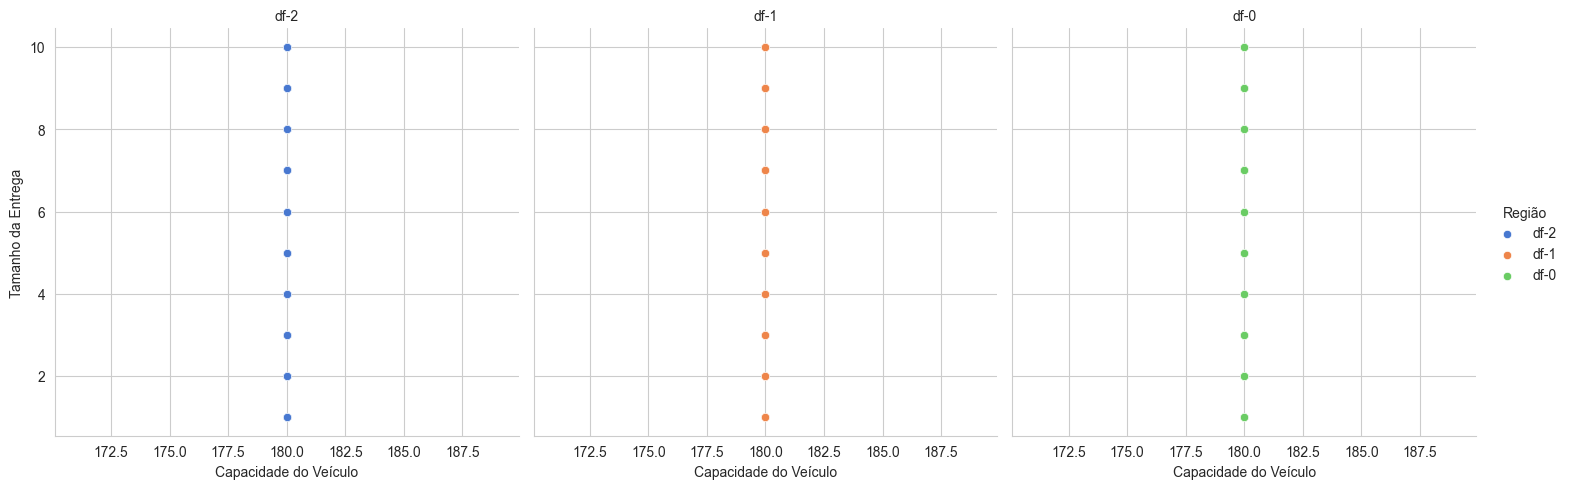

In [26]:
# faça o código de visualização de dados:
#
# - produza pelo menos duas visualizações;
# - adicione um pequeno texto com os insights encontrados;
# - etc.


# 1. Análise de Capacidade de Veículos vs. Tamanho das Entregas
sns.set_style('whitegrid')

# Criar uma FacetGrid para múltiplos gráficos
with sns.axes_style('whitegrid'):
    grafico1 = sns.FacetGrid(deliveries_df, col='region', hue='region', palette='muted', col_wrap=3, height=5)
    g.map(sns.scatterplot, 'vehicle_capacity', 'delivery_size')
    
    # Ajustar títulos e legendas
    grafico1.set_titles('')
    grafico1.set_axis_labels('Capacidade do Veículo', 'Tamanho da Entrega')
    grafico1.add_legend(title='Região')





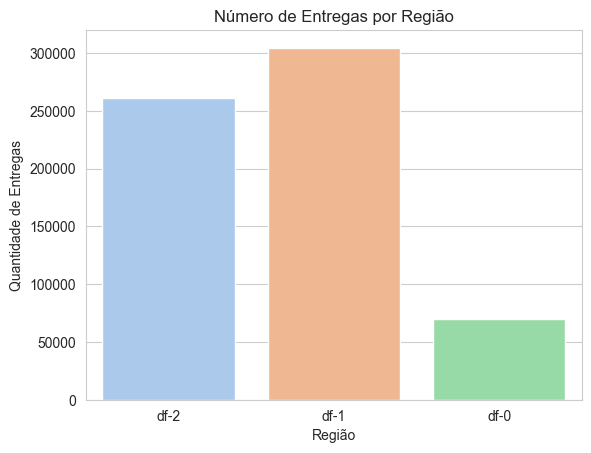

In [28]:
# 2. Análise de Entregas por Região
with sns.axes_style('whitegrid'):
    grafico2 = sns.countplot(data=deliveries_df, x='region', hue='region', palette='pastel')
    grafico2.set(title='Número de Entregas por Região', xlabel='Região', ylabel='Quantidade de Entregas');

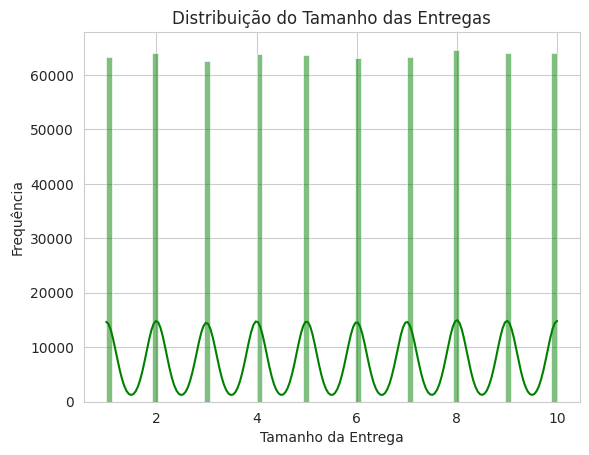

In [25]:
# 3. Distribuição do Tamanho das Entregas
with sns.axes_style('whitegrid'):
    grafico3 = sns.histplot(data=deliveries_df, x='delivery_size', kde=True, color='green')
    grafico3.set(title='Distribuição do Tamanho das Entregas', xlabel='Tamanho da Entrega', ylabel='Frequência');

### Análise de Capacidade de Veículos vs. Tamanho das Entregas
 Gráfico 1: Capacidade do Veículo vs. Tamanho das Entregas

 O gráfico revela que há uma variabilidade considerável no tamanho das entregas em relação à capacidade dos veículos. Não há uma tendência clara de que veículos com maior capacidade realizam entregas maiores, sugerindo que a capacidade dos veículos pode não estar sendo plenamente utilizada em algumas situações. Isso pode indicar uma oportunidade para otimização na alocação dos veículos, ajustando o tipo de veículo às entregas planejadas.

### Número de Entregas por Região
 Gráfico 2: Capacidade do Veículo vs. Tamanho das Entregas

 O gráfico de contagem mostra que algumas regiões têm um volume de entregas significativamente maior do que outras. Regiões com alta concentração de entregas, como a "df-2", podem necessitar de mais recursos, como veículos e pessoal, para manter a eficiência. Esse insight é crucial para o planejamento de recursos e otimização das rotas, garantindo que as áreas de alta demanda sejam bem atendidas.

### Distribuição do Tamanho das Entregas
 Gráfico 3: Capacidade do Veículo vs. Tamanho das Entregas

 A distribuição dos tamanhos das entregas revela uma predominância de entregas de tamanhos pequenos, com uma diminuição gradual para tamanhos maiores. Esse padrão pode indicar que a maioria das operações envolve pequenas entregas, o que pode influenciar a escolha de veículos menores e mais ágeis. Além disso, a presença de um número menor de entregas grandes pode sugerir a necessidade de planejamento específico para essas operações, como a utilização de veículos de maior capacidade.